In [1]:
import numpy as np

In [2]:
# Each row = [hours_studied, hours_slept]
X = np.array([
    [2, 9],  # Student A -> Fail
    [4, 8],  # Student B -> Fail
    [6, 6],  # Student C -> Pass
    [8, 5]   # Student D -> Pass
])

# Target outputs: 0 = Fail, 1 = Pass
y = np.array([0, 0, 1, 1])

In [11]:
learning_rate = 0.1
epochs = 10  # number of times we’ll go through the dataset

# Initialize weights and bias randomly
w = np.random.uniform(-1, 1, X.shape[1])
b = np.random.uniform(-1, 1)

print("Initial weights:", w)
print("Initial bias:", b)

Initial weights: [ 0.44901683 -0.4491169 ]
Initial bias: -0.4765495552559458


In [12]:
def step_function(z):
    return 1 if z >= 0 else 0

In [ ]:
#  Training lopp
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}")
    errors = 0

    for i in range(len(X)):
        x_i = X[i]
        target = y[i]

        # Weighted sum
        z = np.dot(w, x_i) + b
        # Prediction
        y_pred = step_function(z)

        # Error
        error = target - y_pred

        # Update weights and bias if wrong prediction
        if error != 0:
            w = w + learning_rate * error * x_i
            b = b + learning_rate * error
            errors += 1

        print(f"Input: {x_i}, Target: {target}, Predicted: {y_pred}, New Weights: {w}, Bias: {b}")

    # Stop early if no errors in this epoch
    if errors == 0:
        print("\nTraining converged early — no errors left ✅")
        break

print("\nFinal Weights:", w)
print("Final Bias:", b)
print("="*40)


Epoch 1
Input: [2 9], Target: 0, Predicted: 1, New Weights: [ 0.26426513 -0.6985633 ], Bias: 0.13391835538573957
Input: [4 8], Target: 0, Predicted: 0, New Weights: [ 0.26426513 -0.6985633 ], Bias: 0.13391835538573957
Input: [6 6], Target: 1, Predicted: 0, New Weights: [ 0.86426513 -0.0985633 ], Bias: 0.23391835538573957
Input: [8 5], Target: 1, Predicted: 1, New Weights: [ 0.86426513 -0.0985633 ], Bias: 0.23391835538573957

Epoch 2
Input: [2 9], Target: 0, Predicted: 1, New Weights: [ 0.66426513 -0.9985633 ], Bias: 0.13391835538573957
Input: [4 8], Target: 0, Predicted: 0, New Weights: [ 0.66426513 -0.9985633 ], Bias: 0.13391835538573957
Input: [6 6], Target: 1, Predicted: 0, New Weights: [ 1.26426513 -0.3985633 ], Bias: 0.23391835538573957
Input: [8 5], Target: 1, Predicted: 1, New Weights: [ 1.26426513 -0.3985633 ], Bias: 0.23391835538573957

Epoch 3
Input: [2 9], Target: 0, Predicted: 0, New Weights: [ 1.26426513 -0.3985633 ], Bias: 0.23391835538573957
Input: [4 8], Target: 0, Pre

In [6]:
def predict(hours_studied, hours_slept):
    z = w[0]*hours_studied + w[1]*hours_slept + b
    return step_function(z)

In [7]:
# Test new students
test_data = [
    [5, 7],  # Expected: Pass
    [2, 6],  # Expected: Fail
    [7, 5],  # Expected: Pass
    [3, 9]   # Expected: Fail
]

In [8]:
print("\nTesting new students:")
for data in test_data:
    result = predict(data[0], data[1])
    status = "Pass" if result == 1 else "Fail"
    print(f"Hours Studied: {data[0]}, Hours Slept: {data[1]} --> Predicted: {status}")


Testing new students:
Hours Studied: 5, Hours Slept: 7 --> Predicted: Pass
Hours Studied: 2, Hours Slept: 6 --> Predicted: Fail
Hours Studied: 7, Hours Slept: 5 --> Predicted: Pass
Hours Studied: 3, Hours Slept: 9 --> Predicted: Fail


In [9]:
import matplotlib.pyplot as plt

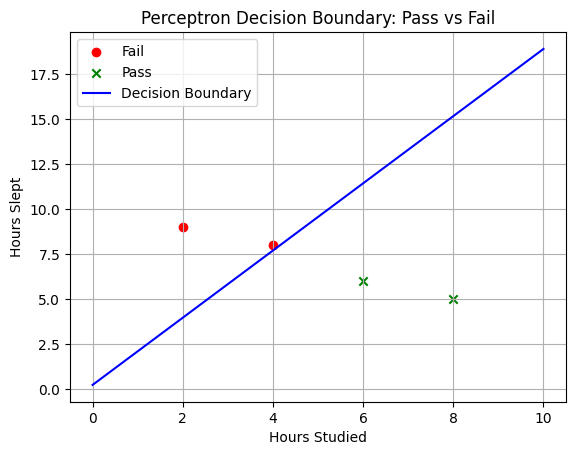

In [ ]:

# Create a scatter plot of training data
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', marker='o', label='Fail' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='green', marker='x', label='Pass' if i == 2 else "")

# Plot decision boundary line
# Equation: w1*x + w2*y + b = 0 --> y = -(w1/w2)*x - (b/w2)
x_vals = np.linspace(0, 10, 100)
y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])

plt.plot(x_vals, y_vals, color='blue', label='Decision Boundary')

# Labels and title
plt.xlabel("Hours Studied")
plt.ylabel("Hours Slept")
plt.title("Perceptron Decision Boundary: Pass vs Fail")
plt.legend()
plt.grid(True)
plt.show()
